# Introduction
1. Name : Cindra C 
2. Batch : 009

Time passes and changed, as well as the behaviour of our customer. Customer will always seek for the better deals, better services, and avoiding bad experiences. It's all normal, but if we let them go then it might be dangerous for our company. In order to handle these problems, predicting Churn Risk is a way to keep our customer retention. Therefore this project is exist: to predict your churn-risk-customer.

The dataset was collected from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/discussion). This is the case of Binary Classificaiton (Yes/No) with the use of ANN as models. Further EDA will explained in this notebook

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier, Pool

from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense , Input , Dropout, BatchNormalization
import pickle

# Data Load

In [2]:
df = pd.read_csv('data_churn.csv')
pd. set_option('display.max_columns', None) #config to see all columns
df.columns = df.columns.str.lower() #change all columns into lowercase

In [3]:
# df.to_csv('deployment\\frontend\\dataset.csv') #needed to use this for frontend purpose

In [4]:
df #looking at the data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


About The Data


| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |
| Churn            | Whether the customer churned or not (Yes or No)                                                                    |



I can divide these data into two big part.
1. The customer's profile : Gender, Senior Citizen, Partner, Dependents, Tenure, Contract, PaymentMethod, and Paperless Billing
2. The services they use : InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamintTV, StreamingMovies


# EDA

In [5]:
df.info() #see data's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


> This datasets have 7043 Entries with 21 columns. Mostly are `object` type but some of them can be changed into `int` (totalcharges).  I think there's no missing value here, but this will be checked further.

> I don't think customer id column will be much useful for analysis and model, but this one is useful to check any duplicate  

In [6]:
df.duplicated().sum() #check duplicate

0

> There is no duplicate data, this column now can be drop since tt has too high cardinality and have the same function as Index

In [7]:
df.drop('customerid', axis=1, inplace=True) #dropcustomerid column

In [8]:
df.totalcharges.value_counts() #checking unqiue value in totalcharges colulmns because i cant change its type

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

> There are 11 empty string. This should be a missing value.

In [9]:
df['totalcharges'] = df["totalcharges"].replace(" ", np.nan) #replacing empty string into nan
df.totalcharges = df.totalcharges.astype('float64') #change totalcharges type into float64
print(f'There are {df.totalcharges.isna().sum()/ len(df)} % of data in totalcharges is missing') #count % of missing value in totalcharge

There are 0.001561834445548772 % of data in totalcharges is missing


There's only 0.001% data that missing, i decide to drop this value

In [10]:
df = df.dropna() #drop missing value

In [11]:
df.describe().T #see numerical descriptive

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


> The longest customer that stays with the company is 72 month (6 years) with the average of 32 month (2,6 years). Nothing suspicious like outlier/missing value here. 

> There's a different value between totalcharges and monthly charges * tenure. Is this because the company's T&C or is there are any mistaken value?

> The longer the customer stay, the charges are higher. The significance need to be analyzed further. The cheapest charges is 18.25 and the maximum is 118.75. Looking at `monthlycharges` column, their mean and median is different, i think they have skewed distribution

In [12]:
_df = df.copy() #just because i dont want my original data is lost

In [13]:
# for the target i need to change the column's type, to make me easier for the analysis
df['churn'] = (df['churn'] == 'Yes').astype(int) #those who answer Yes, will replaced with 1 

C:\Users\hp\AppData\Local\Temp/ipykernel_4120/554452512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = (df['churn'] == 'Yes').astype(int) #those who answer Yes, will replaced with 1


<AxesSubplot:ylabel='churn'>

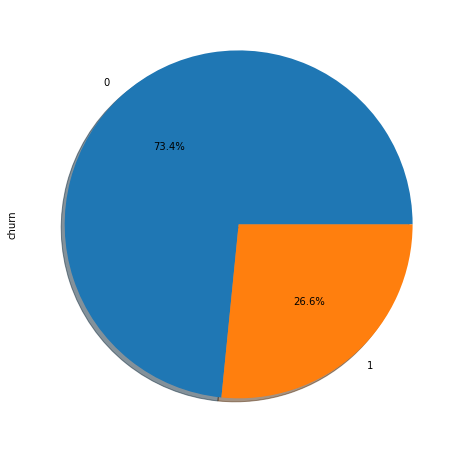

In [14]:
targets = df.churn.value_counts()
targets.plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))

> This resulting in imbalance of our data between those classes. This data provides lots of information STAY(73%) customer. We can still analyze it but we need to use consider using SMOTE to make our models better.

## Cardinality

In [15]:
#cardinality check
cardinal = df.select_dtypes(include='object')
for uniq in cardinal : 
  print(f'Total of Cardinality in columns {uniq} : ',len(cardinal[uniq].unique()))

Total of Cardinality in columns gender :  2
Total of Cardinality in columns partner :  2
Total of Cardinality in columns dependents :  2
Total of Cardinality in columns phoneservice :  2
Total of Cardinality in columns multiplelines :  3
Total of Cardinality in columns internetservice :  3
Total of Cardinality in columns onlinesecurity :  3
Total of Cardinality in columns onlinebackup :  3
Total of Cardinality in columns deviceprotection :  3
Total of Cardinality in columns techsupport :  3
Total of Cardinality in columns streamingtv :  3
Total of Cardinality in columns streamingmovies :  3
Total of Cardinality in columns contract :  3
Total of Cardinality in columns paperlessbilling :  2
Total of Cardinality in columns paymentmethod :  4


> I dont think there any high cardinality in this datasets since it only have maximum 4 uniqueness in this data. We can move on to next step

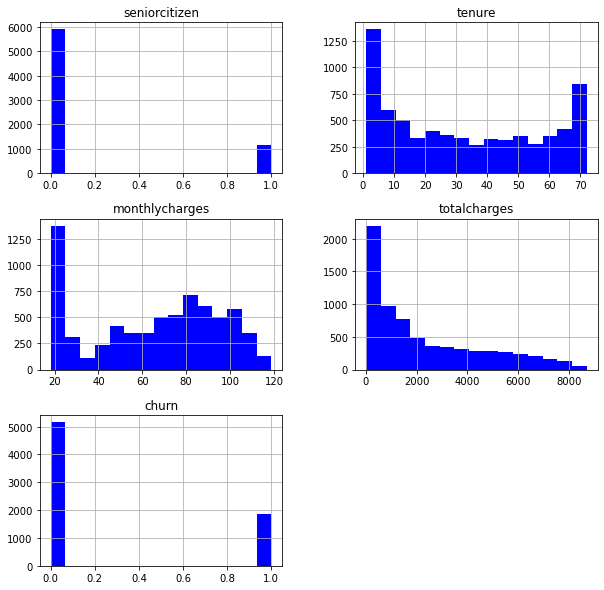

In [16]:
#data distribution
df.hist(bins=15, figsize=(10,10), color='blue');

> There are lots of `not a senior citizen` customer in this data. 

> Most of our customer don't last too long since we can see the distribution is mostly located in lower value, this means the they only last < 10 months. 

> Lots of new customer (0 tenure) and fast-pace customer (only 1month)

> As the definition says about what is `monthlycharges and totalcharges`, there should be a correlation between them and tenure. If we see from this distribution, totalcharges have lower value yet monthly charges spread in `middle value`. I'd like to analyze this further

In [17]:
df[['tenure','monthlycharges', 'totalcharges']] #analyze the correlation between these columns

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


> Index 0 shows that customer who only last for 1month only charged 29.85, no further charges. But this need to be analyzed about what they're subs.

> index 2 shows that customer who last for 2 months have totalcharges twice from their monthlycharges.

> Those, i can conclude that these columns do have relations but might be different in terms of what subs they made(internetservice and phoneservice). I Assume I only need 1 columns (either monthly charges/total charges) as my feature in this models but this needs to be analyzed to know which feture is better to use

In [18]:
df['diff'] = df['totalcharges'] - df['monthlycharges'] * df['tenure'] #see the extra cbarge between totalcharge and monthlycharge*venue
df[['diff','totalcharges','monthlycharges','tenure']].sort_values(by='diff').head(10) #see top10 with lowest extra charge

C:\Users\hp\AppData\Local\Temp/ipykernel_4120/2232958919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['totalcharges'] - df['monthlycharges'] * df['tenure'] #see the extra cbarge between totalcharge and monthlycharge*venue


,diff,totalcharges,monthlycharges,tenure
1746,-370.85,8013.55,116.45,72
1997,-360.65,6717.90,105.65,67
2337,-355.35,5510.65,104.75,56
3200,-354.05,5278.15,104.30,54
3634,-347.80,7845.80,113.80,72
2264,-335.25,7711.25,114.95,70
6710,-321.95,3023.65,69.70,48
4086,-300.50,5401.90,79.20,72
6582,-296.00,7283.25,106.75,71
5028,-288.60,7624.20,109.90,72


> There's an extra cost up to 375 and discount up to 371 as well. There are customers who got discount and those who got an extra cost. I somehow think that those customer who got `extra cost` too much will tend to churn. This will be anaylised further is my assumption is right or no

## Correlation

Text(0.5, 1.0, 'Linear Correlation With Churn Customer')

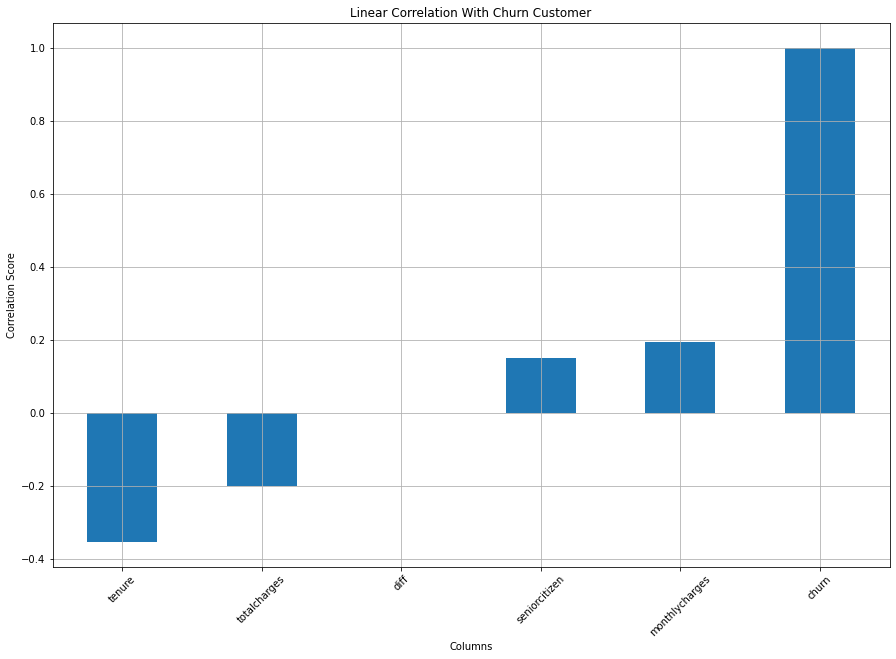

In [19]:
plt.subplots(figsize=(15, 10))
corr = df.corr()['churn'].sort_values()
corr.plot(kind='bar')
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Columns')
plt.ylabel('Correlation Score')
plt.title('Linear Correlation With Churn Customer')

> It's a small correlation score since it only range from 0 - 0.2. This means I'd like to include all of these columns `if they are independent`

<AxesSubplot:>

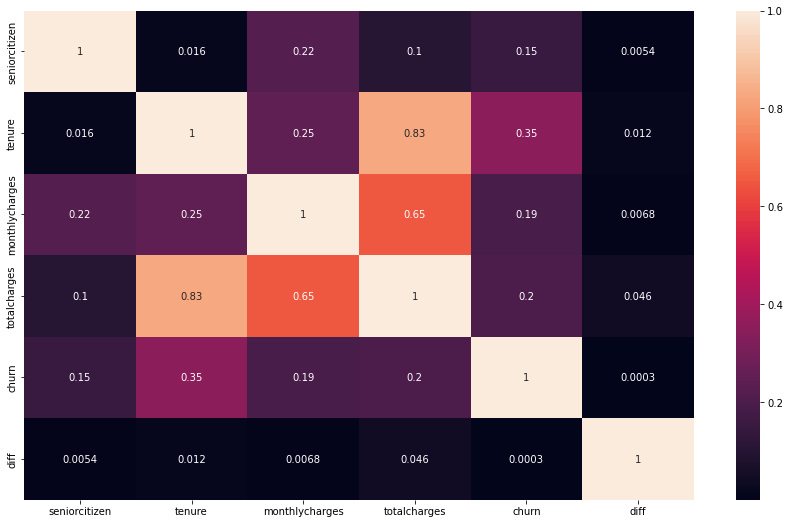

In [20]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr().abs(), annot=True) #check multicorrelation each column

> As i Expect, there's a high correlation between totalcharge and tenure columns. Of course it is, because totalcharges is monthlycharges * tenure. This means we can drop either tenure/totalcharge. I prefer to drop totalcharge and use monthlycharge instead

In [21]:
#analyze in the uniqueness from each column
for cols in cardinal:
  print(f'{cols} : {df[cols].unique()}')

gender : ['Female' 'Male']
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
phoneservice : ['No' 'Yes']
multiplelines : ['No phone service' 'No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes' 'No internet service']
onlinebackup : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport : ['No' 'Yes' 'No internet service']
streamingtv : ['No' 'Yes' 'No internet service']
streamingmovies : ['No' 'Yes' 'No internet service']
contract : ['Month-to-month' 'One year' 'Two year']
paperlessbilling : ['Yes' 'No']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


> There are columns with the same uniqueness > onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, and streamingmovies because they have `No internet service` as their value. Maybe they have correlation with the internetservice column? As well as multiplelines, why would it have `no phone service` as their value, is it connected with phoneservice?

In [22]:
no_internetservice = df[df.internetservice == 'No'][['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']]
no_internetservice.value_counts()

onlinesecurity       onlinebackup         deviceprotection     techsupport          streamingtv          streamingmovies    
No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    1520
dtype: int64

In [23]:
no_phoneservice = df[df.phoneservice == 'No']['multiplelines']
no_phoneservice.value_counts()

No phone service    680
Name: multiplelines, dtype: int64

> Those who dont have internetservice, will have no internetservice either in onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, and streamingmovies columns. 

> As well as phoneservice. Those custome who don't have phoneservice returns with no multiplelines. 

> Therefor I can only pay attention to internetservice and phoneservices. This proof that some features are dependent 

In [24]:
no_paperless = df[df.paperlessbilling == 'No']['paymentmethod']
no_paperless.value_counts()

Mailed check                 949
Bank transfer (automatic)    653
Credit card (automatic)      639
Electronic check             623
Name: paymentmethod, dtype: int64

> I was assuming that maybe those who don't do paperless billing, might only have `automatic` paymentmethod. But the result is : Eventho they choose to not paperless, they still use all of the option for payment. There's no further analysis for paperless billing

In [25]:
#creating function for categorical relation with the target
def correlation_plot (cat1) :
  plt.figure(figsize=(15, 6))

  #amount of category
  plt.subplot(1,3,1)
  sns.countplot(x=cat1, data=df)
  plt.xlabel('Fig 1')
  plt.ylabel(f'Total Customer')
  plt.title(f'Customer {cat1} Category')
  plt.xticks(rotation=45)

  #category with their churned decision
  plt.subplot(1,3,2)
  sns.countplot(x=cat1, data=df, hue='churn')
  plt.xlabel('Fig 2')
  plt.title(f'{cat1} Churned Count')
  plt.xticks(rotation=45)
  plt.legend()

  #people who do churned based on categorical
  plt.subplot(1,3,3)
  df.groupby(cat1).mean()['churn'].sort_values(ascending=False).plot(kind='bar')
  plt.xlabel('Fig 3')
  plt.ylabel('Average of Customer Who Churned')
  plt.title(f'{cat1} Customer That Churned')


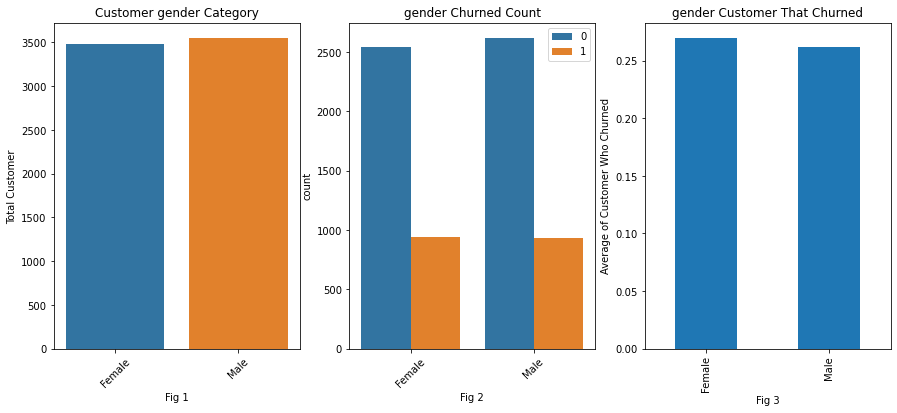

In [26]:
correlation_plot('gender') # is gender affecting their decision to leave?

> Fig 1 : Both female and male have the same proportion in this data, but the amount of those who churned and not is pretty much different

> Fig 2 :  The count of both gender mostly tend to stay.

> Fig 3 : If we took the mean of those who Churned, there's no correlation between Male & Female with Churned. All gender have the same average of churn. 

It means no matter what gender they are, it is not important because their gender won't affect their decision to leave.

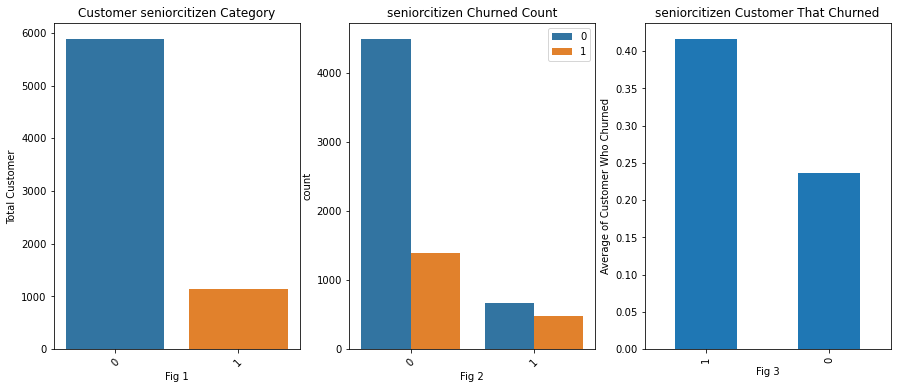

In [27]:
correlation_plot('seniorcitizen') # is the status of senior affecting their decision to leave?

> Fig 1 : There's an imbalance of data between senior & not senior. There are less customer who is senior. Our data consist lots of young customer.

> Fig 2 :  Both senior and not, they tend to stay by the count, actually. But due to imbalance of dataset, it'd be unfair if we use the count of those who churned/not

> Fig 3 : Therefore we look at the average. Those who is senior tend to churned rather than those who is junior

There are lots of possibilities why the senior-er the customer, the more likely they're to churn. But there is a discussion in [Quora](https://www.quora.com/In-the-telecommunication-industry-Is-the-churn-rate-higher-in-senior-citizens-in-comparison-with-others-If-yes-what-might-be-the-factors-that-contribute-to-this) that explain why senior customer more likely to churn `being higher churn rate in seniors due to death, moving in with family members or a nursing or senior apartment that has its own switch. It’s also typical for very elderly seniors to have a land line instead of cell phone.`

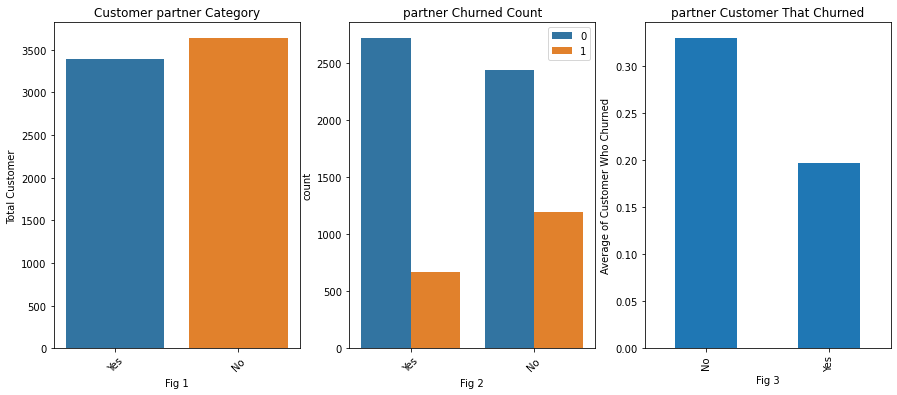

In [28]:
correlation_plot('partner') # is having partner affecting their decision to leave?

> Fig 1 : This dataset have balance amount of customer who have partner & don't.

> Fig 2 :  Those who don't have partner tend churned, but overall they want to stay in our company

> Fig 3 : The mean of those who churned are higher when they don't have partner

Assuming that the churn is affected because they don't have partner, it might because they stay alone and they like to explore other's services. It might different with someone who live with their partner, changing subscription might be hard because they have different perspective and decide to stay in what they're currently in

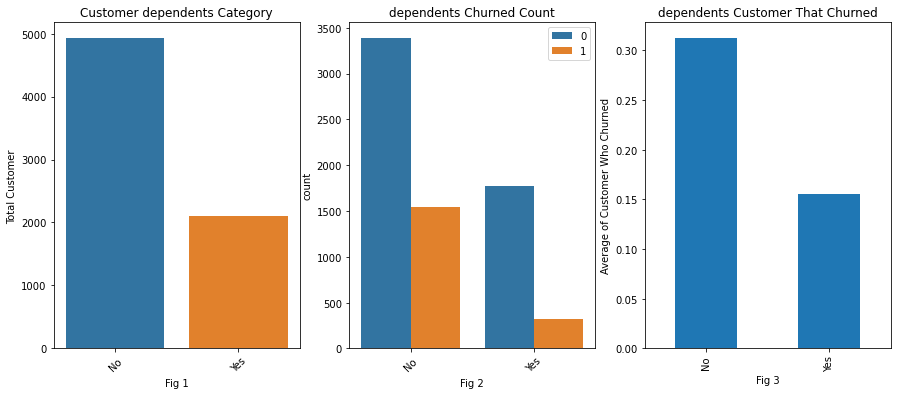

In [29]:
correlation_plot('dependents') # is having dependents affecting their decision to leave?

> Fig 1 : This dataset majorly consist customer who don't have dependents.

> Fig 2 :  Those who don't have dependents tend stay, but remember our data is imbalance for the classes. Seeing only in fig 2 is not fair

> Fig 3 : The mean of those who churned are higher when they don't have dependents

Similar like `do they have partner/no`, a condition where our customer don't have dependents make them feel free to change and live as they want to be. Let's take a sample when we have a children and they like `Spacetoon channel` that only exist in A Company, while we actually love `CNN News` that don't exist in A company, it'll be hard for us to decide which company should we stay. Therefore, those who don't have dependents can live freely and choose what they want, that's why their churn rate is higher

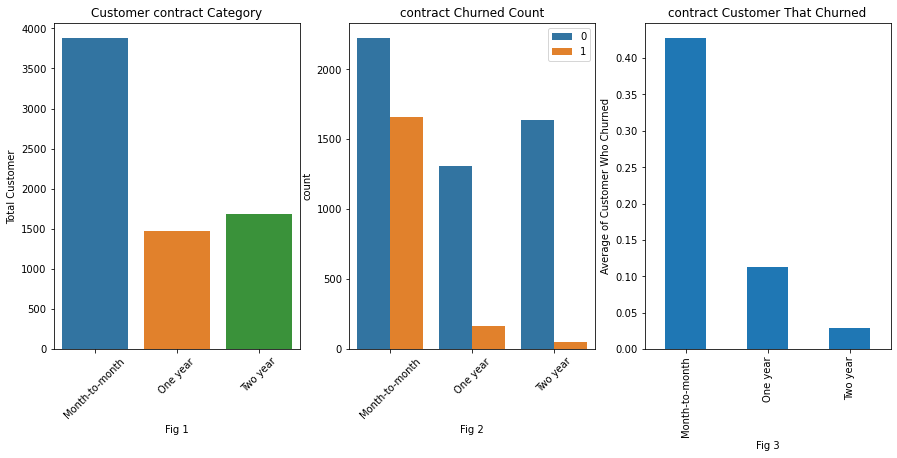

In [30]:
correlation_plot('contract') # is the customer's contract affecting their decision to leave?

> Fig 1 : Most of our customer is having month-to-month contract

> Fig 2 :  Overall, no matter what their contract is, they still tend to stay, but it's not fair since our dataset for contract is not balance

> Fig 3 : The mean of those who churned are higher when they have month to month contract, the longer their contract, the longer they stay in company (not churn)

Even tho month-to-month contract having higher churn rate, but this should be considered with their monthly charges. If in the end we get more profit with serving month-to-month contract, then its fine even if we lost our customer. But my objective is to not letting them go, I want them to stay. Why so ? [HireDNA](https://hiredna.com/churn-rate-and-contract-length-finding-the-sweet-spot-for-your-saas-product/#:~:text=One%20of%20the%20best%20studies,average%20churn%20rate%20of%2016.7%25.) have explained it. There are pro-cons about keepingcustomer to stay by serving longer contract, While having a contract length of 2.5 years or longer has nearly half the churn rate of one that’s less than a year, there are some inherent drawbacks that could potentially hurt your overall revenue. 

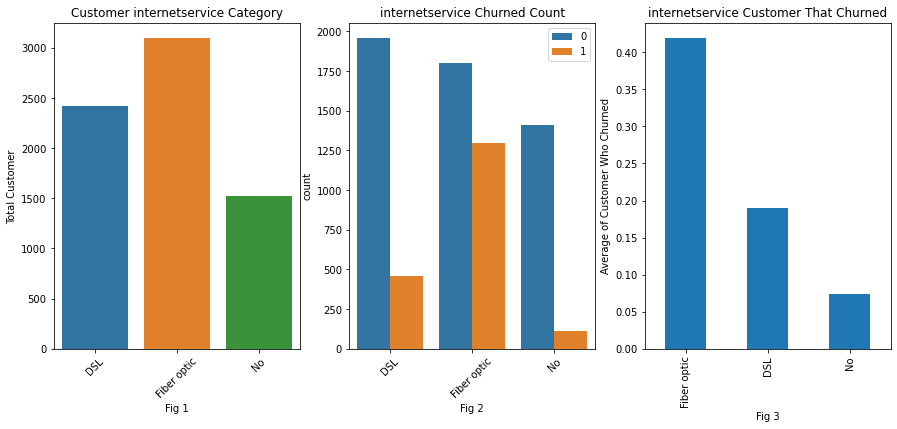

In [31]:
correlation_plot('internetservice') # is having internetservice affecting their decision to leave?

> Fig 1 : Most of our user have `fiber optic` as their internet service.

> Fig 2 : All of the internet service our customer choose still resulting in their tendention to stay, but fiber optic have higher amount of churn. 

> Fig 3 : Customer with fiber optic as their internetservice have the highest score of churned.

However, those who have fiber optic internetservices tends to churn. The discussion goes [here](https://www.cybiant.com/resources/predicting-customer-churn-in-power-bi/#:~:text=Remarkably%2C%20the%20churn%20rate%20of,company%20is%20even%20below%2010%25.).By common-sense one could interfere that it is more difficult to end your contract and look for a new telco provider when a customer has no access to the internet. This could be a cause for the low churn-rate of this group of customers. Although one has to keep in mind customers could buy internet services at other companies. I personally assume this is because our company's fiber optic is too uncomfortable/unaffordable. This will be analyzed further

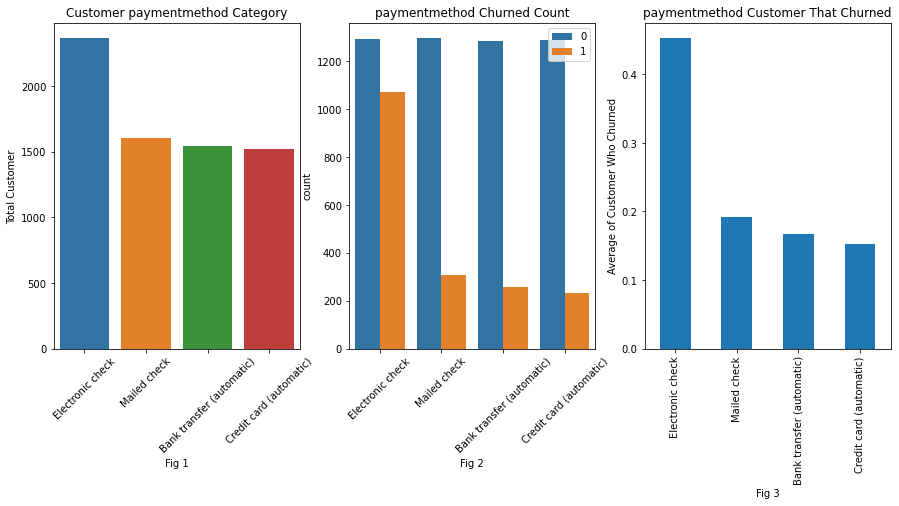

In [32]:
correlation_plot('paymentmethod') # is payment methods affecting their decision to leave?

> Fig 1 : Mostly, our customer use electronic check for their payment method

> Fig 2 : However, electronic check also have the highest value of churned 

> Fig 3 : Those who churned are those who mostly use electronic check as their payment

Since it's related to `payment` there might be additional charge if we prefer to electronic check as our payment method. This will be analyzed further. But that's my assumption because there's a differences with monthlycharges, tenure, and totalcharges. The totalcharges columns are high than monthlycharges * tenure, there must be unseen charges that needs to be known.

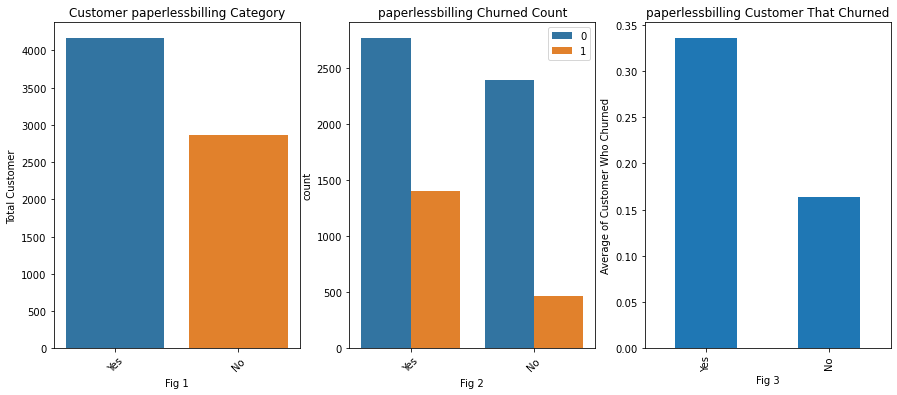

In [33]:
correlation_plot('paperlessbilling') # is paperlessbilling affecting their decision to leave?

> Fig 1 : Mostly, our customer use prefer to paperlessbilling

> Fig 2 : However, paperless billing also have the higher value of churned 

> Fig 3 : Those who churned are those who mostly use prefer paperlessbilling

It's hard to create any assumption about this feature, is those customer who choose paperlessbilling charged higher? or is it hard for them to make payments? are we late in sgiving them service ? do they actually need transparancy for their charges? My only assumptions is because they don't feel comfortable when its become paperlessbilling, or probably this feature actually not `independent`. This need to be analyzed further

In [34]:
churn_mean = df.groupby('churn').mean() #looking at the behaviour of churned customer
churn_mean

,seniorcitizen,tenure,monthlycharges,totalcharges,diff
churn,,,,,
0,0.128995,37.650010,61.307408,2555.344141,0.140858
1,0.254682,17.979133,74.441332,1531.796094,0.187266


> By looking at the table above, we can conclude that churned customer are those who pay high monthlycharges. They might feel like this is `too expensive` for monthlycharges

> Meanwhile, those who stays pays lower monthly charges yet higher totalcharges.

> Those who leaves are customer with higher extra cost

Why so?
Because those who churned are those who do month to month contract, it means month-to-month contract are more expensive than yearly contract. It's obvious if the totalcharges for those who curned are lower because they stopped at the 1st month of use. Therefore I state totalcharges is not a good feature, type of contract and monthlycharges is better to become a feature for price range

In [35]:
internet_service_mean = df.groupby('internetservice').mean() #looking at the internet service charges
internet_service_mean.sort_values(by='monthlycharges')

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,diff
internetservice,,,,,,
No,0.034211,30.667763,21.076283,665.220329,0.074342,0.664276
DSL,0.107202,32.889487,58.088017,2119.789259,0.189983,-0.196316
Fiber optic,0.268411,32.917959,91.500129,3205.304570,0.418928,0.175016


[Text(0.5, 1.0, 'Relation Between InternetServices With MonthlyCharges')]

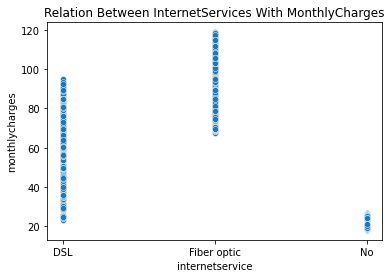

In [36]:
#check price range for internetservice
sns.scatterplot(x=df['internetservice'], y= df['monthlycharges']).set(title='Relation Between InternetServices With MonthlyCharges')

> My assumption was right.  Those user who have internetservice (either it is fiberoptic or DSL) have a higher price range for monthlycharges. But Fiberoptic is the most expensive one. This is why our customer is leave, there might an uncomfortable services with high price and our customer don't like it and they prefer to leave.

[Text(0.5, 1.0, 'Relation Between Phoneservice With MonthlyCharges')]

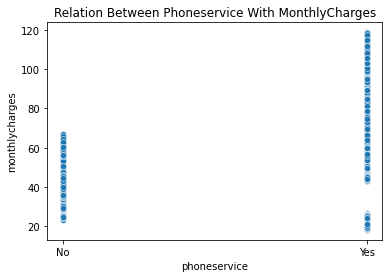

In [37]:
#check price range for internetservice
sns.scatterplot(x=df['phoneservice'], y= df['monthlycharges']).set(title='Relation Between Phoneservice With MonthlyCharges')

> As well as internetservice, those who use Phone service have to pay more for their charges. The range is up to 20-120 while those without phone service only need to pay for 25-65 for their monthly charges

## EDA CONCLUSION

After I do analyze our datasets about why we lost our customer, here are some insights that needed to be considered

1. Those who churned are those who have `month-to-month` contract. Because they have month-to-month contract, they have short tenure and they left. The average of their monthlycharges is higher than those who do `yearly` contract.

2. However, mostly our customer prefer to have month-to-month contract. This should be considered is it better to let them go and finding new customer or should we retain them by giving certain longer contract.

3. The services that makes the price goes up is internetservices with fiberoptic as options because the price range is higher and phoneservice. It is normal for expensive price when we use internetservice, but having trouble with churn customer means we might lack in giving them service. It's not about price, but about the service.

4. Gender doesn't really affect the tendention to stay/churned. Customer's profile that might affecting the decision to churned is senior citizen, dependents, contract, payment method, and paperless billing

# Data Preprocessing

## Seed Setting

In [52]:
#setting up seed to keep the value 
tf.random.set_seed(55)
np.random.seed(55)

## Split Data

In [53]:
X = df.drop(columns = ["churn"]) # features
y = df["churn"] # target label

In [54]:
random_state=50 #stating random_state to make it constant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = random_state)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify=y_train, random_state = random_state)

> I take 10% for testing set, 20% for validation set, and 70% for my training set.

> I decide to take higher portion for training for models to learn better

## Feature Engineering

Based on my EDA, I've found features that are not independent. For my models I'm going to use all independent columns as my feature. Those features are : 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'internetservice', 'contract', 
       'paperlessbilling', 'paymentmethod', 'monthlycharges'

In [40]:
#creating pipeline for scaling and encoding
scaling = Pipeline([('scaler', StandardScaler())])
encode = Pipeline([('encoder', OneHotEncoder())])

In [41]:
prep_pipeline = ColumnTransformer([
     ('scaling', scaling , ['monthlycharges','tenure','seniorcitizen']), #scaling all numerical columns
     ('encode', encode, ['paymentmethod','paperlessbilling','contract','internetservice','phoneservice',
     'partner','dependents']) #encoding all categorical columns
])

> Take a note that the default setting of ColumnTransformer is `dropping` the column we don't write. Meaning the rest of the columsn that are not listed in `prep_pipeline` is now gone and we can continue to the next step

In [55]:
#clean the data with preprocessing pipeline
X_train_ = prep_pipeline.fit_transform(X_train_)
X_val_final = prep_pipeline.transform(X_val)
X_test_final = prep_pipeline.transform(X_test)

In [56]:
X_train_.shape #look how much shape in X_train_ for input Node

(5062, 21)

> It has 21 features, means we have 21 as input and 1 as outout (binary classification)

In [57]:
#tensorflow pipeline
train_data = tf.data.Dataset.from_tensor_slices((X_train_, y_train_)).shuffle(10000).batch(30)

val_data = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).shuffle(10000).batch(30)

> I choose to use batch=30 to reduce the computation and process for epochs. I've tried with several different number (5, 10, and 20) but the result for classificaiton report is not significant. Why would we took a high cost when the result is just the same with the cheap cost, huh ? I prefer to use easier one

# Model Definition

Using 2 API : Functional and Sequential

## Functional API

In [58]:
input = Input(shape=(21,)) #shape of X_train_ is 21 after encode
layer_1 = Dense(8, activation='relu')(input)
output = Dense(1, activation='sigmoid')(layer_1)

model_1 =  Model(inputs=input, outputs=output)

## Sequential API

In [59]:
model= Sequential()
model.add(Dense(16,activation='relu', input_shape=(21,))) #1 hidden layer with 16neuron
model.add(Dense(1, activation='sigmoid')) #1 output

# Model Training
This part take baseline model and further will be improved with Model Improvement

In [60]:
################### SEQUENTIAL ###################

model.compile(loss='binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history = model.fit(train_data, epochs= 50, validation_data = val_data)

################### FUNCTIONAL ###################                     

model_1.compile(loss='binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history_1 = model_1.fit(train_data, epochs= 50, validation_data = val_data)

Epoch 1/50
169/169 [==============================] - 2s 4ms/step - loss: 0.5657 - accuracy: 0.6956 - val_loss: 0.4681 - val_accuracy: 0.7686
Epoch 2/50
169/169 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.7912 - val_loss: 0.4416 - val_accuracy: 0.7820
Epoch 3/50
169/169 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.7979 - val_loss: 0.4361 - val_accuracy: 0.7859
Epoch 4/50
169/169 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8013 - val_loss: 0.4346 - val_accuracy: 0.7844
Epoch 5/50
169/169 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8034 - val_loss: 0.4334 - val_accuracy: 0.7852
Epoch 6/50
169/169 [==============================] - 1s 3ms/step - loss: 0.4175 - accuracy: 0.8017 - val_loss: 0.4331 - val_accuracy: 0.7820
Epoch 7/50
169/169 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8032 - val_loss: 0.4329 - val_accuracy: 0.7859
Epoch 

# Model Evaluation

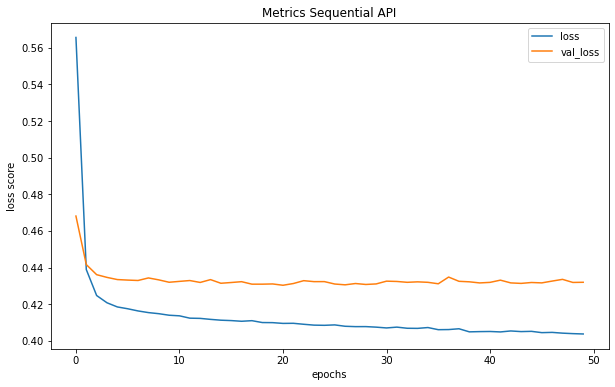

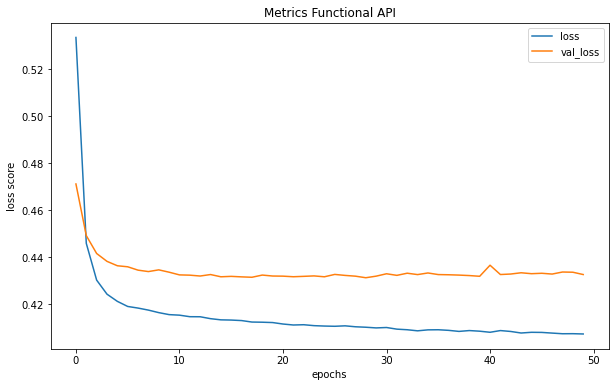

In [61]:
metrics = pd.DataFrame(history.history)
metrics_1 = pd.DataFrame(history_1.history)


# plt.subplot(1,3,1)
metrics[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# plt.subplot(1,2,2)
metrics_1[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

> Take a look in y label, the range for loss score is 0.40 - 0.45 (only different 0.05 score) for both methods, this is a narrow range. In further, even tho this is a little bit `overfit` but it is still tolerable. I'm not going to look at accuracy score because it's not my main goal.

> Since both Sequential & Functional resulting the same loss, I think they don't have significant differences even tho i've set different neuron (Sequential =16, Functional = 8). I assume this is because our dataset is not `big enough` to use a different Dense layer.

> By personal insist, I'll choose to use Sequential API because the start point of val_loss is lower than Functional and have better line in val_loss (not too extreme score)

In [62]:
### SEQUENTIAL 16 NEURON
y_pred = model.predict(X_test_final)
y_pred = np.where(y_pred > 0.5, 1, 0) #0.5 as threshold for classification

print("#### SEQUENTIAL THRESHOLD 0.5 ####")
print(classification_report(y_test, y_pred))

y_pred_3 = model.predict(X_test_final)
y_pred_3 = np.where(y_pred_3 > 0.3, 1, 0) #0.3 as threshold for classification

print("#### SEUQNTIAL THRESHOLD 0.3####")
print(classification_report(y_test, y_pred_3))

#### SEQUENTIAL THRESHOLD 0.5 ####
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.62      0.50      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.77      0.79      0.78       704

#### SEUQNTIAL THRESHOLD 0.3####
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       517
           1       0.51      0.73      0.60       187

    accuracy                           0.74       704
   macro avg       0.70      0.74      0.70       704
weighted avg       0.78      0.74      0.75       704



> Remember that our data is imbalance and I'm not using SMOTE. We have lots of 0 classes(stay). This means our models might having trouble to predict data in classes 1 (minority). Seen in classification report within 0.5 threhold, t he score for data in class 1 is worse than class 0. Despite using SMOTE, I'm trying to `play` with the threhsold of classification with 0.5 and 0.3 as threshold.

> I want my model to be better in predicting those who's going to churn rather than stay. This means I want my model to be accurate to predict class 1. I'm avoiding my model to wrong predict at churn customer, therefore I need to maximize the recall score because recall score is a score with the minimum False Negative

> That's why I like to use the 0.3 threshold. Even tho our data is imbalance, but with 0.3 threhsold the recall score is better.

> Since this is a baseline model, we can still improve our model through Model Improvement

> I did try to use SMOTENC but it resulting worse to predict the class and the val score is not much different without SMOTE. I want to make this notebook as easy as i can therefore I delte all coding related to SMOTENC

## Model Improvement

In [63]:
model_improved = Sequential()

model_improved.add(Dense(16,activation='relu', input_shape=(21,))) #1st layer

model_improved.add(Dropout(rate=0.3))
model_improved.add(BatchNormalization())
model_improved.add(Dense(8, activation='relu',kernel_initializer='glorot_uniform'))

# after do some trial and error, regularization below doesn't really impacting the result
model_improved.add(Dropout(rate=0.3))
model_improved.add(BatchNormalization())
model_improved.add(Dense(4, activation='relu'))
#those regularizatiom above  have no significant impact on the results, it'd be fine if we don't want to use this layer

model_improved.add(Dense(1, activation='sigmoid')) #1 output


model_improved.compile(loss='binary_crossentropy', #binary classification Yes/No
              optimizer = 'adam', #adaptive n momentum
              metrics = ['accuracy','Recall'])

history_improved = model_improved.fit(train_data, epochs= 100, #100-200 epochs have no significant chagnes on the results, prefer to use 100 
                    validation_data = val_data)

Epoch 1/100
169/169 [==============================] - 3s 7ms/step - loss: 0.5785 - accuracy: 0.7343 - recall: 0.0000e+00 - val_loss: 0.5362 - val_accuracy: 0.7338 - val_recall: 0.0000e+00
Epoch 2/100
169/169 [==============================] - 1s 4ms/step - loss: 0.5263 - accuracy: 0.7343 - recall: 0.0000e+00 - val_loss: 0.4936 - val_accuracy: 0.7338 - val_recall: 0.0000e+00
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.7343 - recall: 0.0000e+00 - val_loss: 0.4713 - val_accuracy: 0.7338 - val_recall: 0.0000e+00
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 0.4908 - accuracy: 0.7343 - recall: 0.0000e+00 - val_loss: 0.4663 - val_accuracy: 0.7338 - val_recall: 0.0000e+00
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.7343 - recall: 0.0000e+00 - val_loss: 0.4620 - val_accuracy: 0.7338 - val_recall: 0.0000e+00
Epoch 6/100
169/169 [==============================] - 

Text(0, 0.5, 'loss score')

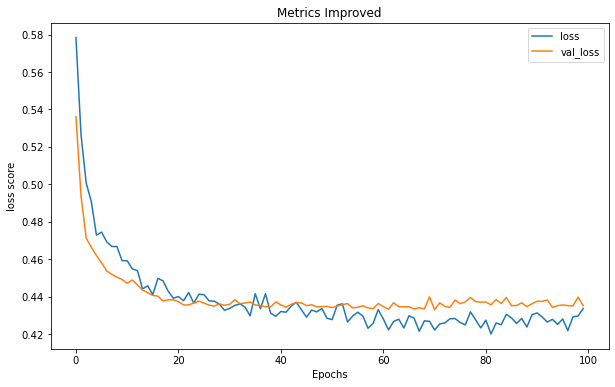

In [64]:
metrics_improved = pd.DataFrame(history_improved.history)

metrics_improved[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Improved')
plt.xlabel('Epochs')
plt.ylabel('loss score') #checking on loss history from my model

> We can't tell much from graphs for my improved models, it doesn't looks like changing at all. But here we know that our models is no longer overfit when the epochs is 100 and the range for y is more narrow (0.42 - 0.44)

Text(0, 0.5, 'recall score')

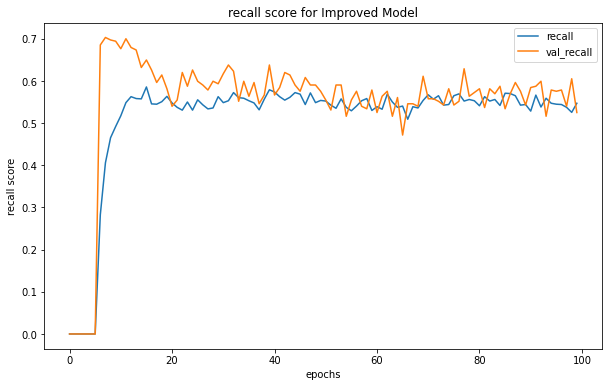

In [65]:
metrics_improved[['recall', 'val_recall']].plot(figsize=(10, 6)) #Looking at recall score graph
plt.title('recall score for Improved Model')
plt.xlabel('epochs')
plt.ylabel('recall score')

> My score for recall is abstract in train data. The maximum recall score is only placed between 0.5 - 0.7, which mean this is still bad.  But that's fine because our data is pretty much imbalance and we might fail in predicting certain class

In [66]:
y_pred_improved = model_improved.predict(X_test_final)
y_pred_improved = np.where(y_pred_improved > 0.5, 1, 0)

print("#### THRESHOLD 0.5 ####\n")
print(classification_report(y_test, y_pred_improved))

y_pred_improved_3 = model_improved.predict(X_test_final)
y_pred_improved_3 = np.where(y_pred_improved_3 > 0.3, 1, 0)

print("\n#### THRESHOLD 0.3 ####\n")
print(classification_report(y_test, y_pred_improved_3))

#### THRESHOLD 0.5 ####

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.63      0.50      0.56       187

    accuracy                           0.79       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704


#### THRESHOLD 0.3 ####

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       517
           1       0.51      0.74      0.60       187

    accuracy                           0.74       704
   macro avg       0.70      0.74      0.70       704
weighted avg       0.79      0.74      0.75       704



> Somehow, after I do improve my model, there's no much significant differences for 0.3 Threshold. But the accuracy is decreasing. I don't take accuracy score seriously because I'm paying attention on recall. The recall score for class 1 is higher with improvement 0.3 threshold, works well as how I want my model to works. But the score is not much diffenret with un-improved model. I Prefer to use my Improved Model for predicting new data since it distinguish each classes better (class 0 and 1 have 74 score recall) with 0.3 threshold

> Model Improvement works for the data where the threshold is 0.5 in class 0. Mostly the score is increasing in class 0 and decreasing in class 1. This is a bad idea. It's better for us to make the model can distinguish different class. 

In [67]:
#take a look of the result
pred_result = pd.DataFrame({"Actual ":y_test,
    "Baseline 0.3 Threshold" : y_pred_3[:,0],
    "Baseline 0.5 Threshold" : y_pred[:, 0],
    "Improved 0.3 Threshold ": y_pred_improved_3[:, 0],
    "Improved 0.5 Threshold" : y_pred_improved[:,0],
})

pred_result.head(10)

,Actual,Baseline 0.3 Threshold,Baseline 0.5 Threshold,Improved 0.3 Threshold,Improved 0.5 Threshold
2893,1,0,0,0,0
1639,1,1,0,1,0
1124,0,0,0,0,0
1474,0,0,0,0,0
3284,0,1,0,1,0
2456,0,0,0,0,0
3594,0,1,0,1,0
3051,0,0,0,0,0
1107,0,0,0,0,0
3597,0,1,0,1,0


My analysis for the table above is here :
> 1. Between 0.3 and 0.5 threshold, predicting class 1 is better at 0.3 threshold. 
> 2. Baseline and Improved model doesn't show any significant change. This is normal because I'm only capable in increasing 0.1 score for it's classification reports
> 3. Threshold with 0.3 having trouble in predicting class 0 (wrong predict at index number 3284 and 3597) but this is not a big problem as long as I'm prioritizing in class 1. Why? because we don't want to lost our customer in reality with predicting that they will stay (false negative)

# Model Saving

In [68]:
# save preprocessing pipeline
with open('preppipe.pkl', 'wb') as file:
    pickle.dump(prep_pipeline, file)

# save model
model_improved.save('model.h5')

> Note that there might be changes in the result, I'm telling you that my model is saved with the best score I've reach with 0.3 threshold :

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       517
           1       0.51      0.74      0.60       187

    accuracy                           0.74       704

# Model Inference

For this data I'm going to use manual inputdata

In [69]:
inf= [{'seniorcitizen' : 0, 
    'partner' : 'No',
    'dependents' : 'No', 
    'tenure' : '12',
    'phoneservice' : 'No',
    'internetservice' : 'Fiber optic',
     'contract' : 'One year',
     'paperlessbilling' : 'Yes',
     'paymentmethod' : 'Bank transfer (automatic)', 
     'monthlycharges' : 70}]
df_inf = pd.DataFrame(inf)
df_inf

,seniorcitizen,partner,dependents,tenure,phoneservice,internetservice,contract,paperlessbilling,paymentmethod,monthlycharges
0,0,No,No,12,No,Fiber optic,One year,Yes,Bank transfer (automatic),70


In [71]:
#scaling & encoding inference data
df_inf_scaled = prep_pipeline.transform(df_inf)

# predicting inference data
y_pred_inf = model_improved.predict(df_inf_scaled)
y_pred_inf_threshold = np.where(y_pred_inf > 0.3 , 1, 1) #use 0.3 threshold

y_pred_inf_threshold

array([[1]])

> Data inference that I've created resulting in class 1 which means this customer is going churn

# Conclusion

## Data Analysis
In predicting churn, mostly our customer who churn have these characteristics : 
1. They're senior (old)
2. They don't have partner
3. They don't have dependents
4. They have month-to-month contract
5. They have Fiber Optic internetservice as the most expensive price
6. They pay with Electronic Check
7. They prefer paperless billing
8. They monthlycharges is higher
9. They have phoneservice as their service
Further analysis please check EDA Part

## Model Analysis
1. In predicting churn, we should focus at those customer who's churn (Having 1 Value in here) and pay attention to their `recall` score so we're not going to wrong predict in the customer who's churn in real. 
2. Even tho our data train is imbalance for class 0 and 1, but playing with the threhsold of probability resulting better score in recall (we got 70+ score for each class in 0.3 threshod). 

3. Model improvement is not working well with the 0.3 threshold, yet it works in 0.5 threshold and caused the model to be `professional` in predicting those who stay (which is not the objective).

4. The computations for this models is not much since I keep the epoch low, and using higher BatchSize and shuffle to make it faster. We don't really need to add much layers because our datasets is not that big. Having too much layer will caused datasets and failing our model in predicting class 1.